### Red, red wiiiiine
Loading wine quality dataset as a .csv and training on red wine first.
It seems logical to separate both types, I imagine training on both together would cause poor performance.

In [1]:
import numpy as np
import sys
sys.path.append("..")
from train_test_split import train_test_split
from knn import KNearestNeighbours 
from classification_tree import ClassificationTree
from logistic_regression import SoftmaxRegression
from preprocessing import MinMaxScaler

red_wines = np.genfromtxt("../datasets/wine+quality/winequality-red.csv", delimiter=";",skip_header=1)
print(red_wines)
X_red = red_wines[:, :-1]  # All rows, all but the last column for features
y_red = red_wines[:, -1]   # All rows, only the last column for the target variable

print(X_red[:5])
print(y_red[:5])

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]
[5. 5. 5. 6. 5.]


In [2]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, seed=2108)

scaler_redwine = MinMaxScaler()
X_scaled_train_red = scaler_redwine.fit_transform(X_red_train)

knn_red = KNearestNeighbours(15)
tree_red = ClassificationTree()
sm_red = SoftmaxRegression(n_iterations=10000)

In [3]:
knn_red.fit(X_scaled_train_red,y_red_train)
tree_red.fit(X_scaled_train_red,y_red_train)
sm_red.fit(X_scaled_train_red,y_red_train)

scaled_test_x = scaler_redwine.transform(X_red_test)

pred_knn_red = knn_red.predict(scaled_test_x)
pred_tree_red = tree_red.predict(scaled_test_x)
pred_sm_red = sm_red.predict(scaled_test_x)

print(pred_knn_red == y_red_test)
print("KNN Accuracy: ", np.mean(pred_knn_red == y_red_test))
print(pred_tree_red == y_red_test)
print("Tree Accuracy: ", np.mean(pred_tree_red == y_red_test))
print(pred_sm_red == y_red_test)
print("Softmax Accuracy: ", np.mean(pred_sm_red == y_red_test))

[False False  True  True False  True  True  True False  True  True False
  True  True  True False False  True False  True  True  True  True  True
  True  True  True  True False  True False  True  True  True  True False
  True  True  True False  True  True False False False  True  True False
 False  True False False False  True  True False  True  True  True False
 False  True False  True  True  True  True False False  True False  True
  True  True  True  True  True False  True False False  True False  True
 False  True False False  True  True False  True False False  True False
 False  True  True False False  True False  True False False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True False False False False False  True  True False  True  True  True
  True False  True False False False  True  True  True False  True False
  True False False  True  True  True  True  True False False False  True
 False  True  True  True  True False False  True Fa

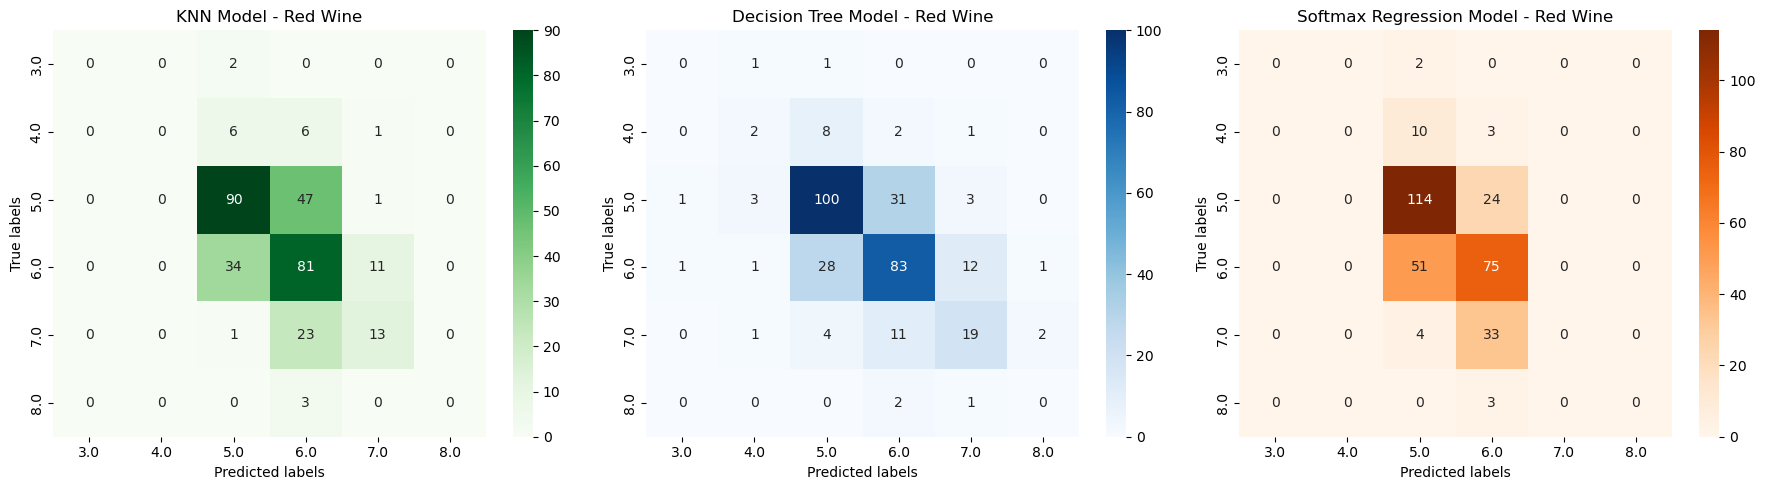

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrices for each model
cm_knn_red = confusion_matrix(y_red_test, pred_knn_red)
cm_tree_red = confusion_matrix(y_red_test, pred_tree_red)
cm_sm_red = confusion_matrix(y_red_test, pred_sm_red)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot confusion matrix for KNN Model
sns.heatmap(cm_knn_red, annot=True, fmt="d", cmap="Greens", ax=axes[0], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[0].set_title('KNN Model - Red Wine')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

# Plot confusion matrix for Decision Tree Model
sns.heatmap(cm_tree_red, annot=True, fmt="d", cmap="Blues", ax=axes[1], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[1].set_title('Decision Tree Model - Red Wine')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

# Plot confusion matrix for Softmax Regression Model
sns.heatmap(cm_sm_red, annot=True, fmt="d", cmap="Oranges", ax=axes[2], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[2].set_title('Softmax Regression Model - Red Wine')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()  # Adjust layout to make room for titles and labels
plt.show()

In [5]:
from cross_validation import k_folds_accuracy_scores, k_folds_accuracy_score

knn_red_folds = KNearestNeighbours(2)
tree_red_folds = ClassificationTree()
softmax_red_folds = SoftmaxRegression(n_iterations=1000)

folds_wine_scaler = MinMaxScaler()
scaled_X_red = folds_wine_scaler.fit_transform(X_red)

knn_scores = k_folds_accuracy_scores(knn_red_folds, scaled_X_red, y_red,k=10,seed=2108)
print(knn_scores)
print("KNN - k=2 - acc: ", np.mean(knn_scores))
print(" ")
tree_scores = k_folds_accuracy_scores(tree_red_folds, scaled_X_red, y_red,k=10,seed=2108)
print(tree_scores)
print("Tree - acc: ", np.mean(tree_scores))
print(" ")
softmax_scores = k_folds_accuracy_scores(softmax_red_folds, scaled_X_red, y_red,k=10,seed=2108)
print(softmax_scores)
print("Softmax - acc:", np.mean(softmax_scores))

[0.6163522012578616, 0.610062893081761, 0.660377358490566, 0.7044025157232704, 0.6226415094339622, 0.6666666666666666, 0.5471698113207547, 0.6792452830188679, 0.6540880503144654, 0.6666666666666666]
KNN - k=2 - acc:  0.6427672955974842
 
[0.6352201257861635, 0.5660377358490566, 0.6540880503144654, 0.6477987421383647, 0.6415094339622641, 0.6477987421383647, 0.5849056603773585, 0.5974842767295597, 0.660377358490566, 0.5773809523809523]
Tree - acc:  0.6212601078167116
 
[0.559748427672956, 0.5283018867924528, 0.5911949685534591, 0.5283018867924528, 0.4591194968553459, 0.4716981132075472, 0.44025157232704404, 0.5911949685534591, 0.5408805031446541, 0.5416666666666666]
Softmax - acc: 0.5252358490566038


## Let's try white wine

In [6]:
white_wines = np.genfromtxt("../datasets/wine+quality/winequality-white.csv", delimiter=";",skip_header=1)
print(white_wines)
X_white = white_wines[:, :-1]  # All rows, all but the last column for features
y_white = white_wines[:, -1]   # All rows, only the last column for the target variable

print(X_white[:5])
print(y_white[:5])

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00]
 [8.100e+00 2.800e-01 4.000e-01 6.900e+00 5.000e-02 3.000e+01 9.700e+01
  9.951e-01 3.260e+00 4.400e-01 1.010e+01]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]]
[6. 6. 6. 6. 6.]


In [7]:
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, seed=2108)

scaler_whitewine = MinMaxScaler()
X_scaled_train_white = scaler_whitewine.fit_transform(X_white_train)

knn_white = KNearestNeighbours(15)
tree_white = ClassificationTree()
sm_white = SoftmaxRegression(n_iterations=1000)

knn_white.fit(X_scaled_train_white,y_white_train)
tree_white.fit(X_scaled_train_white,y_white_train)
sm_white.fit(X_scaled_train_white,y_white_train)

scaled_test_x = scaler_whitewine.transform(X_white_test)

pred_knn_white = knn_white.predict(scaled_test_x)
pred_tree_white = tree_white.predict(scaled_test_x)
pred_sm_white = sm_white.predict(scaled_test_x)

print(pred_knn_white == y_white_test)
print("KNN Accuracy: ", np.mean(pred_knn_white == y_white_test))
print(pred_tree_white == y_white_test)
print("Tree Accuracy: ", np.mean(pred_tree_white == y_white_test))
print(pred_sm_white == y_white_test)
print("Softmax Accuracy: ", np.mean(pred_sm_white == y_white_test))

[False False False  True False  True False  True False  True False  True
  True  True  True  True False  True  True False False False  True False
  True  True  True False  True  True False  True  True False  True False
  True  True  True False False  True False  True False  True  True False
 False  True False False  True False  True False  True False False  True
  True  True False  True  True False False  True False  True  True False
 False False False False  True False False  True False  True  True False
  True False  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False False False  True False
  True  True  True False  True False  True  True False False  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True False  True False False  True False False  True  True False
  True  True  True False False  True  True  True  True  True  True False
 False False  True False  True  True  True False Fa